In [7]:
!pip install pydot

In [45]:
%reset -f 

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [46]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X.shape , train_y.shape

((60000, 28, 28), (60000,))

In [47]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X / 255.0
test_X = test_X / 255.0

# train_y = tf.keras.utils.to_categorical(train_y)
# test_y = tf.keras.utils.to_categorical(test_y)

## Dense Layer

In [48]:
model=None
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [49]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    rankdir='LR', #TB/LR
    show_layer_activations=True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dense_15 (Dense)            (None, 64)                16448     
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [51]:
784*256+256, 256*64+64, 64*10+10

(200960, 16448, 650)

In [58]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, 
                    train_y, 
                    epochs=5,
                    validation_data=(test_X, test_y),
                   )

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.0953 - val_accuracy: 0.9785
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0880 - val_accuracy: 0.9777
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.1047 - val_accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.1099 - val_accuracy: 0.9775
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0996 - val_accuracy: 0.9796


In [61]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9796


[0.09963972866535187, 0.9796000123023987]

In [60]:
classifications = model.predict(test_X)
print(classifications[0])
print(test_y[0])

313/313 [==============================] - 0s 1ms/step
[4.0521470e-10 8.6099333e-10 1.9689612e-10 1.0441560e-08 3.6174537e-15
 1.8282056e-14 1.9303014e-16 1.0000000e+00 1.1895857e-11 2.1270685e-09]
7


In [62]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


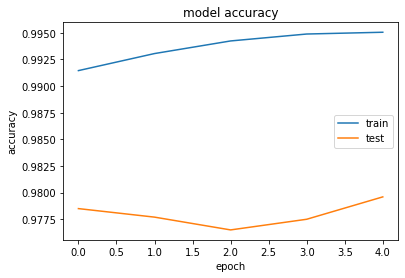

In [64]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CNN

In [65]:
model=None
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [66]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True, 
                          rankdir='LR', #TB/LR
                          show_layer_activations=True
                         ) 

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [67]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_17 (Dense)            (None, 64)               

In [68]:
# Parameter calculation

# https://towardsdatascience.com/how-to-calculate-the-number-of-parameters-in-keras-models-710683dae0ca

(1*9+1)*64, (64*9+1)*64, 1600*64+64, 64*10+10

(640, 36928, 102464, 650)

In [69]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, 
                    train_y, 
                    epochs=5,
                    validation_data=(test_X, test_y),
                   )

Epoch 1/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1284 - accuracy: 0.9611 - val_loss: 0.0507 - val_accuracy: 0.9831
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0345 - val_accuracy: 0.9897
Epoch 3/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0289 - accuracy: 0.9901 - val_loss: 0.0535 - val_accuracy: 0.9835
Epoch 4/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0279 - val_accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.0302 - val_accuracy: 0.9911


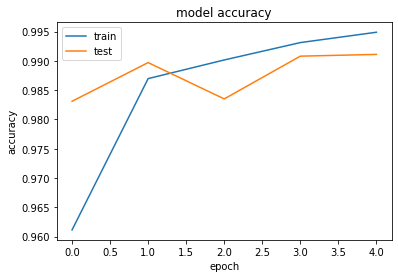

In [70]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

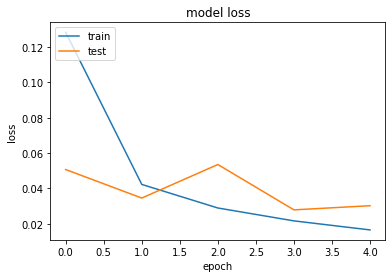

In [71]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Dropout

In [72]:
model=None
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [73]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True, 
                          rankdir='LR', #TB/LR
                          show_layer_activations=True
                         ) 

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [74]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [75]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, 
                    train_y, 
                    epochs=5,
                    validation_data=(test_X, test_y),
                   )

Epoch 1/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2066 - accuracy: 0.9361 - val_loss: 0.0505 - val_accuracy: 0.9846
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0809 - accuracy: 0.9758 - val_loss: 0.0362 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0624 - accuracy: 0.9812 - val_loss: 0.0414 - val_accuracy: 0.9863
Epoch 4/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0299 - val_accuracy: 0.9899
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.0316 - val_accuracy: 0.9892


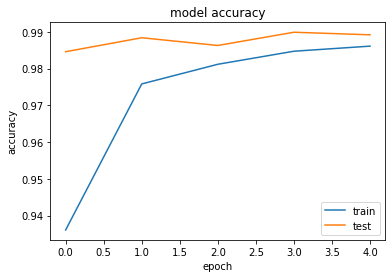

In [77]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

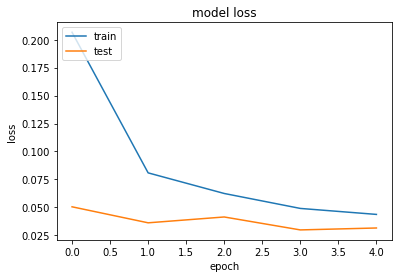

In [78]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

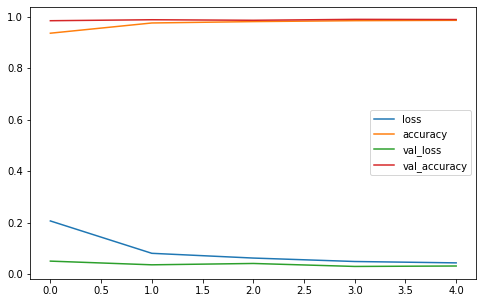

In [84]:
import pandas as pd 
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

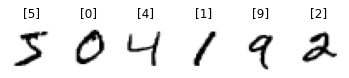

In [85]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,6)
for i in range(6):
    ax[i].imshow(train_X[i:i+1,:,:].reshape(28,28), cmap="binary")
    ax[i].axis("off")
    ax[i].set_title(str(train_y[i:i+1]))
    

## Callback

In [93]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', 
                                            patience=3,
                                            restore_best_weights=False
                                           )

model=None
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [94]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True, 
                          rankdir='LR', #TB/LR
                          show_layer_activations=True
                         ) 

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [95]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 256)       2560      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 256)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        147520    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 5, 5, 64)        

In [96]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, 
                    train_y, 
                    epochs=30,
                    validation_data=(test_X, test_y),
                    callbacks=[callback]
                   )

Epoch 1/30
1875/1875 [==============================] - 176s 94ms/step - loss: 0.1715 - accuracy: 0.9463 - val_loss: 0.0499 - val_accuracy: 0.9834
Epoch 2/30
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0639 - accuracy: 0.9811 - val_loss: 0.0387 - val_accuracy: 0.9871
Epoch 3/30
1140/1875 [=================>............] - ETA: 1:06 - loss: 0.0489 - accuracy: 0.9854

KeyboardInterrupt: 

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Regularization

In [ ]:
# Data Augmentation
# Early Stopping
# DropOut

## Classic Network

In [ ]:
# LeNet-5 
# AlexNet
# VGG 

# ResNet
# Inception

## Importance of 1x1 convolution

## Uses of CNN

In [ ]:
# Image Classification
# Classification + Localization
# Object Detection